In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Salary_Data.csv")

In [8]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [22]:
y = pd.DataFrame(df["Salary"])
x = pd.DataFrame(df["YearsExperience"])

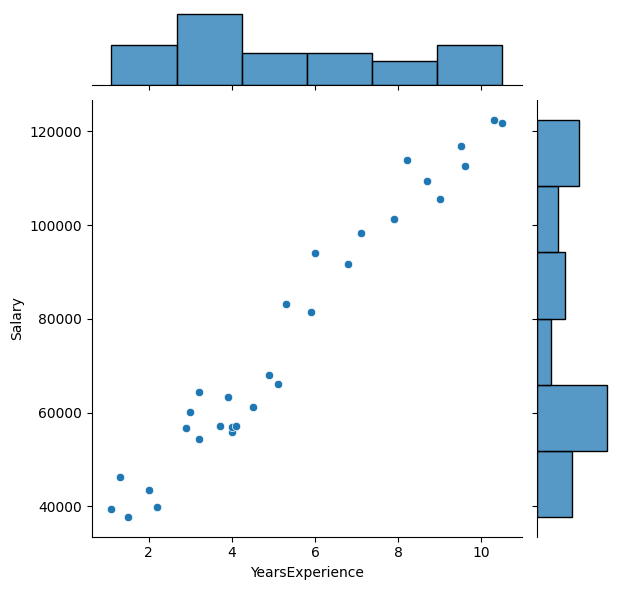

In [12]:
sns.jointplot(x=x.columns[0], y=y.columns[0], data=df)

In [ ]:
#splitting into a training set and a test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,
                                                    random_state=42,
                                                    shuffle= False)

In [ ]:
#training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
#predicted result for test set
y_test_pred = regressor.predict(x_test)

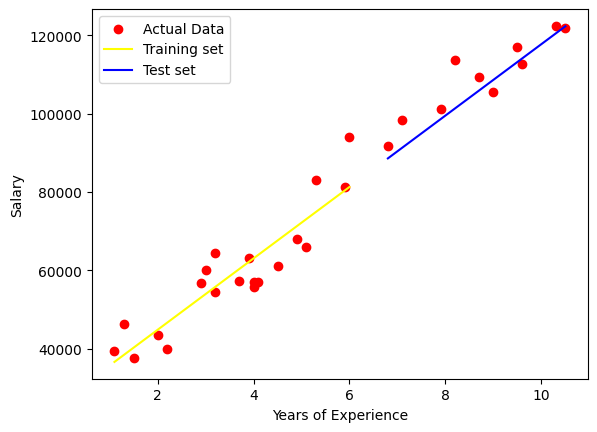

In [65]:
#training vs test viz
plt.scatter(x=x_train, y=y_train, color="red", label="Actual Data")
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, regressor.predict(x_train), color="yellow",
         label="Training set")
plt.plot(x_test, y_test_pred, color="blue", label="Test set")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

Text(0, 0.5, 'Actual Salary')

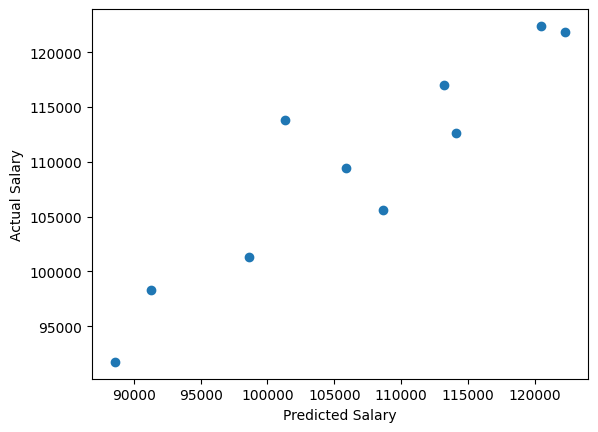

In [ ]:
#checking the accuracy
plt.scatter(y_test_pred, y_test)
plt.xlabel("Predicted Salary")
plt.ylabel("Actual Salary")

In [39]:
df["Predicted_Salary"] = np.round(regressor.predict(x), 2)

In [40]:
df

,YearsExperience,Salary,Predicted_Salary
0,1.1,39343.0,36605.13
1,1.3,46205.0,38428.35
2,1.5,37731.0,40251.57
3,2.0,43525.0,44809.63
4,2.2,39891.0,46632.85
5,2.9,56642.0,53014.13
6,3.0,60150.0,53925.74
7,3.2,54445.0,55748.97
8,3.2,64445.0,55748.97
9,3.7,57189.0,60307.02


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#performance check
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 3950.364242158158
Mean Squared Error: 26392769.68698326
R^2 Score: 0.7154263893579006


In [67]:
residuals = y_test - y_test_pred
residuals

,Salary
20,3171.023416
21,6971.189156
22,2707.297795
23,12482.463535
24,3543.406434
25,-3040.427826
26,3788.515074
27,-1457.096346
28,1917.623713
29,-424.599127


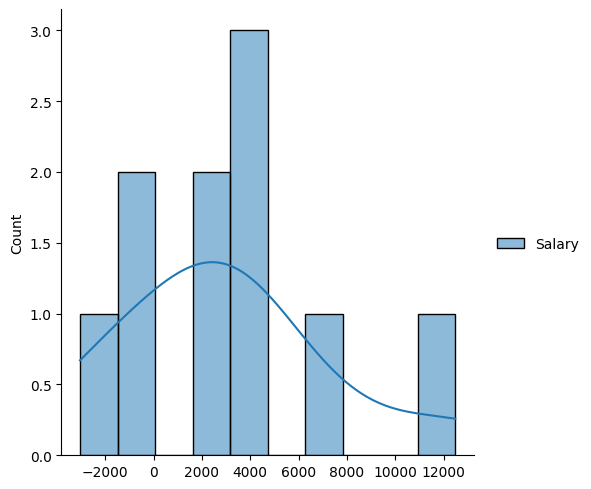

In [71]:
sns.displot(residuals, kde=True, bins=10)

Right-Skewed -- the model *underestimates* the target variable